In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_pickle("data/data_w_feature_eng.pkl")

### Checks for Linear Separability

### Checks for Dataset Balance

Total Number of Entries before reduction: 202024
Distribution of Labels
1    101058
0    100966
Name: label, dtype: int64


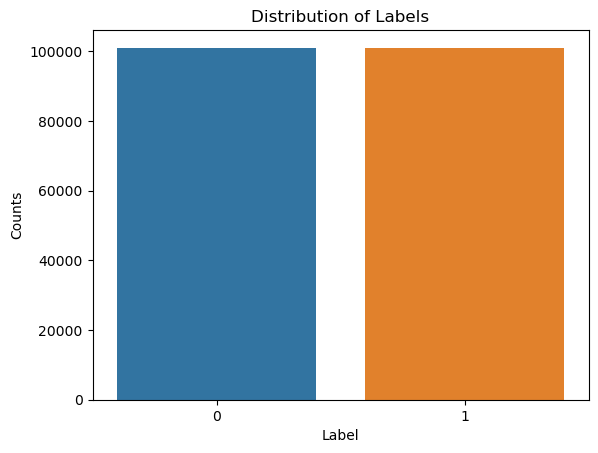

In [4]:
sns.countplot(data, x = "label")
plt.title("Distribution of Labels")
plt.xlabel("Label")
plt.ylabel("Counts")

print("Total Number of Entries before reduction:",len(data))
print("Distribution of Labels")
print(data["label"].value_counts())


Dataset is balanced, no balancing action required

### Checks for Dimensionality

In [14]:
data_features = data.drop(['comment','parent_comment','label','comment_tokens','parent_comment_tokens'],axis=1)

In [15]:
data_features_without_bow_tdidf = data_features.drop(['comment_bow','parent_comment_bow','comment_tdidf','parent_comment_tdidf'],axis = 1)

In [16]:
data_features_without_bow_tdidf

,comment_score,parent_comment_score,weighted_parent_sentiment_score_neutral,weighted_parent_sentiment_score_positive,weighted_comment_sentiment_score_neutral,weighted_comment_sentiment_score_positive,comment_word_count,parent_comment_word_count,comment_token_count,parent_comment_token_count,...,comment_mean_token_length,parent_comment_mean_token_length,comment_char_count,parent_comment_char_count,comment_punctuation_count,parent_comment_punctuation_count,comment_hashtag_count,parent_comment_hashtag_count,comment_number_count,parent_comment_number_count
0,0.1511,-0.4767,0,0,1,0,7,21,3,10,...,4.000000,3.600000,33,100,1,3,0,0,0,0
1,0.0000,0.0000,1,0,1,0,4,3,2,3,...,6.000000,4.666667,21,18,1,1,0,0,0,0
2,0.4019,0.3178,0,1,0,1,8,178,7,107,...,4.571429,4.336449,46,881,2,21,0,0,0,2
3,0.0000,-0.7876,0,0,1,0,9,38,8,22,...,3.500000,5.363636,46,197,2,2,0,0,1,0
4,0.6114,0.0000,1,0,0,1,7,5,5,3,...,2.400000,4.666667,27,25,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202019,0.4404,0.0000,1,0,0,1,6,9,3,7,...,2.666667,4.000000,22,46,1,3,0,0,0,1
202020,0.0000,0.6872,0,1,1,0,22,40,11,19,...,3.090909,5.263158,95,207,3,0,0,0,0,0
202021,-0.1027,0.4019,0,1,1,0,8,18,4,10,...,3.750000,5.300000,34,93,1,1,0,0,0,0
202022,0.0000,0.0000,1,0,1,0,0,8,0,3,...,NaN,6.666667,1,43,0,1,0,0,0,0


In [18]:
print("Number of generic features:",data_features_without_bow_tdidf.shape[1])

Number of generic features: 28


In [22]:
print("Number of dimensions for bow:",data['comment_bow'][0].shape[1])
print("Number of dimensions for parent bow:",data['parent_comment_bow'][0].shape[1])
print("Number of dimensions for tdidf:",data['comment_tdidf'][0].shape[1])
print("Number of dimensions for parent tdidf:",data['parent_comment_tdidf'][0].shape[1])


Number of dimensions for bow: 17805
Number of dimensions for parent bow: 27187
Number of dimensions for tdidf: 17805
Number of dimensions for parent tdidf: 27187


Dimensions for BoW and Tdidf too high, will need to run RFE before training each model

### Train-Test Split for Machine Learning
80-20 Train-Test split

In [23]:
X = data.drop('label', axis = 1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)
train = pd.concat([X_train,y_train], axis = 1)
test = pd.concat([X_test,y_test], axis = 1)
train.to_pickle("data/train.pkl")
test.to_pickle("data/test.pkl")